# Corusan Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics as stat

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 18, 8
pd.set_option('display.max_columns',500)

In [2]:
plan19 = pd.read_excel('Prueba consultores Junio 2022.xlsx',sheet_name='Plantilla a Julio 2019')
df_bajas = pd.read_excel('Prueba consultores Junio 2022.xlsx',sheet_name='Bajas de Agosto 2019')
df_altas = pd.read_excel('Prueba consultores Junio 2022.xlsx',sheet_name='Altas de Agosto 2019')


#Creamos columna con antigüedad en dias y años para cada empledo
plan19['Fecha de Alta'] = pd.to_datetime(plan19['Fecha de Alta'])
plan19['antiguedad (días)'] = (dt.datetime.now()-plan19['Fecha de Alta']).dt.days
plan19['antiguedad (años)']= plan19['antiguedad (días)']/365

plan19['Fecha3']=plan19['Fecha de Alta'].astype(str)
plan19[['año_alta','mes_alta','dia_alta']]=plan19['Fecha3'].str.split('-', expand=True)
plan19['mes_alta']=plan19['mes_alta'].astype(int)
plan19['año_alta']=plan19['año_alta'].astype(int)
plan19['Año']=plan19['Año'].astype(int)

plan19["Localización País"] = plan19["Localización País"].replace("SÃO PAULO","São Paulo")
plan19["Localización País"] = plan19["Localización País"].replace("Sao Paulo","São Paulo")
plan19["Localización País"] = plan19["Localización País"].replace("SAO PAULO","São Paulo")


#Creamos columna edad
plan19['edad (días)'] = (dt.datetime.now()-plan19['Fecha de Nacimiento']).dt.days
plan19['edad (años)']= plan19['edad (días)']/365

df_altas['edad (días)'] = (dt.datetime.now()-df_altas['Fecha nacimiento']).dt.days
df_altas['edad (años)']= df_altas['edad (días)']/365

df_bajas['edad (días)'] = (dt.datetime.now()-df_bajas['Fecha nacimiento']).dt.days
df_bajas['edad (años)']= df_bajas['edad (días)']/365

In [533]:
plan19.head()

,Convenio Aplicable,Localización País,Área Funcional,Localización Ciudad,Subactividad_desc,Año,COD. UNIDAD DE NEGOCIO,Mes,Reducción de Jormada,Tipo de contrato,División,Subactividad,Género,Departamento,HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO,Nombre del puesto,Nacionalidad,Estado de empleado,PROMEDIO DE HORAS SEMANALES TRABAJADAS EN EL MES,Fecha de Nacimiento,Clase de empleado,Discapacidad,Fecha de Alta,ID persona,antiguedad (días),antiguedad (años),Fecha3,año_alta,mes_alta,dia_alta,edad (días),edad (años)
0,Sí,España,Red - Planificación Tecnológica,VIZCAYA,tecnologíayplanificación,2019,156,Jul,No,Fijo,"OPERACIONES, RED Y TI",Tecnología y Planificación,M,ESTRAT. Y DESARR. DE RED E INFRAESTR. TI,37.5,ENCARGADO DE OPERACION,ESPAÑOLA,Activo,37.5,1954-09-08,EMP,No,1978-12-21,Persona 1716852,15879,43.504110,1978-12-21,1978,12,21,24749,67.805479
1,Sí,España,Red - Planificación Tecnológica,ALICANTE,tecnologíayplanificación,2019,156,Jul,No,Fijo,"OPERACIONES, RED Y TI",Tecnología y Planificación,M,ESTRAT. Y DESARR. DE RED E INFRAESTR. TI,37.5,TITULADO SUPERIOR O MASTER,ESPAÑOLA,Activo,37.5,1952-02-12,EMP,No,1979-07-13,Persona 1716853,15675,42.945205,1979-07-13,1979,7,13,25688,70.378082
2,No,España,Direccion,TARRAGONA,gestionydireccion,2019,156,Jul,No,Fijo,CONSEJERA DELEGADA COO,Gestión y Direccion,M,MAYORISTA,37.5,TITULADO SUPERIOR O MASTER,ESPAÑOLA,Activo,37.5,1954-06-07,EMP,No,1981-12-01,Persona 1716854,14803,40.556164,1981-12-01,1981,12,01,24842,68.060274
3,Sí,España,Red - Planificación Tecnológica,HUESCA,tecnologíayplanificación,2019,156,Jul,No,Fijo,"OPERACIONES, RED Y TI",Tecnología y Planificación,M,ESTRAT. Y DESARR. DE RED E INFRAESTR. TI,37.5,OPERADOR DE COMUNICACIONES,ESPAÑOLA,Activo,37.5,1956-06-04,EMP,No,1981-12-01,Persona 1716855,14803,40.556164,1981-12-01,1981,12,01,24114,66.065753
4,Sí,España,Direccion,MADRID,gestionydireccion,2019,156,Jul,No,Fijo,ESTRATEGIA,Gestión y Direccion,M,PLANIFICACION NEGOCIO Y TRANSF DIGITAL,37.5,TITULADO SUPERIOR O MASTER,ESPAÑOLA,Activo,37.5,1966-12-01,EMP,No,1986-12-15,Persona 1716856,12963,35.515068,1986-12-15,1986,12,15,20282,55.567123


In [454]:
df_altas.head()

,Subactividad_desc,Subactividad,Genero,Fecha nacimiento,Clase empleado,Nombre del puesto,COD. UNIDAD DE NEGOCIO,Fecha alta,Tipo alta local,Tipo alta global,ID Persona,edad (días),edad (años)
0,tecnologíayplanificación,Tecnología y Planificación,M,1966-06-27,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-28,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19887,20439,55.997260
1,tecnologíayplanificación,Tecnología y Planificación,M,1970-12-20,EMP,ASESOR BASE,156,2019-08-09,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19888,18802,51.512329
2,gestionydireccion,Gestión y Direccion,M,1971-10-09,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-04,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19890,18509,50.709589
3,gestionydireccion,Gestión y Direccion,M,1971-01-03,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-13,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19891,18788,51.473973
4,vigilanciayseguridad,Vigilancia y Seguridad,F,1962-11-26,EMP,ADMINISTRATIVO,156,2019-08-08,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19892,21748,59.583562


In [455]:
df_bajas.head()

,ID persona,Unidad de Negocio,COD. UNIDAD DE NEGOCIO,Subactividad_desc,Subactividad,Genero,Fecha nacimiento,Fecha fin de contrato,Tipo de baja local,Clase de empleado,Tipo de baja global,Nombre del puesto,edad (días),edad (años)
0,Persona 1716855,España,156,tecnologíayplanificación,Tecnología y Planificación,M,1952-02-12,2019-08-10,b.2) Otras bajas vegetativas,EMP,b.2) Otras bajas vegetativas,TITULADO SUPERIOR O MASTER,25688,70.378082
1,Persona 1716863,España,156,gestionydireccion,Gestión y Direccion,F,1952-02-12,2019-08-10,b.2) Otras bajas vegetativas,EMP,b.2) Otras bajas vegetativas,TITULADO SUPERIOR O MASTER,25688,70.378082
2,Persona 1716872,España,156,vigilanciayseguridad,Vigilancia y Seguridad,M,1989-09-14,2019-08-11,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,TITULADO/TECNICO MEDIO O DE GRADO,11959,32.764384
3,Persona 1716873,España,156,vigilanciayseguridad,Vigilancia y Seguridad,F,1988-09-06,2019-08-19,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,EXPERTO NIVEL 2,12332,33.786301
4,Persona 1716956,España,156,tecnologíayplanificación,Tecnología y Planificación,M,1966-12-01,2019-08-21,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,TITULADO SUPERIOR O MASTER,20282,55.567123


### (1) ¿Cuántos FTEs tiene la compañía en julio? ¿Qué porcentaje de dedicación tienen los empleados de la compañía durante el mes de Julio de 2019?

Podemos calcular los FTEs de la compañia en julio como: el número de trabajadores equivalentes a tiempo completo que proporcionarían las mismas horas de trabajo en un mismo período de tiempo (día, semana, mes, año) que la plantilla actual de la compañía. Se obtiene dividiendo la suma total de horas de trabajo del total de trabajadores de la empresa (ya sea a tiempo completo y/o tiempo parcial) entre la jornada laboral / o número de horas máximas teóricas de la compañía ( ya sea por día, semana, mes, año).

Para el calculo se tendrá en cuenta que España y Brasil presentan la misma jornada laboral completa (40h) para sus trabajadores.

In [456]:
FTEs = sum(plan19['PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES'])/40
FTEs

47608.167500000054

In [457]:
print("En julio de 2019 la empresa presenta", len(plan19), "empleados y", round(FTEs,2), "FTEs")

En julio de 2019 la empresa presenta 48431 empleados y 47608.17 FTEs


Porcentaje de dedicación

In [458]:
horas_trab=(plan19['PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES'].sum()/plan19['HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO'].sum())*100

In [459]:
print("Se han cubierto entre todos los empleados el",round(horas_trab,2),"% de las horas teóricas")

Se han cubierto entre todos los empleados el 93.96 % de las horas teóricas


### (2) ¿Cuantos empleados tiene la compañía a 31 de Agosto teniendo en cuenta las altas y las bajas de ese período?

In [460]:
len(plan19)-len(df_bajas)+len(df_altas)

48654

In [10]:
len(df_bajas)

360

In [11]:
len(df_altas)

583

### (3) ¿Qué Índices de rotación ha tenido la compañía durante el mes de Agosto?  
    3. A. Índice de Rotación Bruta: Número de bajas totales/num empleados inicio del período * 100  
    3. B. Índice de Rotación Neta: (Número de bajas + número de contrataciones) / 2] / num empleados inicio periodo * 100   
    3. C. Índice de Rotación Bruta voluntaria: Número de bajas voluntarias / num empleados inicio del período * 100  
    3. D. Índice de Rotación Bruta Involuntaria: Número de bajas involuntarias /num empleados inicio del período * 100  

In [461]:
ro_brut = (len(df_bajas)/len(plan19)) *100
ro_net = (((len(df_bajas)+len(df_altas))/2) / len(plan19)) *100

bajas_vol= len(df_bajas[df_bajas['Tipo de baja global']=='b.1) Renuncias voluntarias'])
bajas_invol = len(df_bajas[df_bajas['Tipo de baja global']!='b.1) Renuncias voluntarias'])

ro_brut_vol = (bajas_vol / len(plan19)) *100
ro_brut_inv = (bajas_invol / len(plan19)) *100

In [462]:
print("Índice de Rotación Bruta:",ro_brut,"\n","Índice de Rotación Neta:",ro_net,"\n",
      "Índice de Rotación Bruta voluntaria:",ro_brut_vol,"\n","Índice de Rotación Bruta Involuntaria:",ro_brut_inv
     )

Índice de Rotación Bruta: 0.743325555945572 
 Índice de Rotación Neta: 0.9735499989676034 
 Índice de Rotación Bruta voluntaria: 0.14040593834527473 
 Índice de Rotación Bruta Involuntaria: 0.6029196176002973


### (4) Antigüedad media de los empleados que trabajan en Andalucía.

In [463]:
andalu=['SEVILLA','MALAGA','CADIZ','CORDOBA','GRANADA','ALMERIA','HUELVA','JAEN'] 

In [464]:
df_and=plan19[plan19['Localización Ciudad'].isin(andalu)]

df_and['Fecha de Alta'] = pd.to_datetime(plan19['Fecha de Alta'])
df_and['antiguedad (días)'] = (dt.datetime.now()-df_and['Fecha de Alta']).dt.days
df_and['antiguedad (años)']= df_and['antiguedad (días)']/365

In [465]:
df_and['antiguedad (años)'].mean()

29.90739402437736

In [466]:
print("La antigüedad media de los empleados en andalucia es de",round(df_and['antiguedad (años)'].mean(),2),"años")

La antigüedad media de los empleados en andalucia es de 29.91 años


### ¿Está cumpliendo CORUSAN con la LISMI?

In [467]:
plan19[plan19['Localización País']=="España"]['Discapacidad'].value_counts()

No    15877
Sí      142
Name: Discapacidad, dtype: int64

In [468]:
(142/15877)*100

0.8943755117465516

No la está cumpliendo, se exige un 2% de discapacitados del total de la plantilla y no llegan al 1%

### Realiza un análisis del tipo de bajas que se han producido durante el mes de Agosto por tipo de puesto de trabajo, rangos de edad, género y zona geográfica.


In [3]:
df_bajas['edad'] = ((dt.datetime.now()-df_bajas['Fecha nacimiento']).dt.days)/365

Tipos de bajas producidas

In [4]:
df_bajas['Tipo de baja global'].value_counts()

a.2 ) X otras causas (Indemnizaciones)    290
b.1) Renuncias voluntarias                 68
b.2) Otras bajas vegetativas                2
Name: Tipo de baja global, dtype: int64

In [6]:
df_altas['Subactividad'].value_counts()

Fuerza de ventas directa                                                                  165
Canal telefónico - Atención                                                               153
Producción IT                                                                              98
Call Center técnico                                                                        32
Instalación y mantenimiento Red de Acceso (Red Externa)                                    29
Backoffice                                                                                 13
Mantenimiento Red Troncal (Red Interna)                                                    11
Soporte ventas                                                                              7
Operaciones Red para empresas                                                               7
Desarrollo de Proyectos Estratégicos y Transformación                                       7
Ingeniería y construcción de infraestructuras de Red Troncal

In [472]:
df_bajas['Subactividad'].value_counts()[:10]

Call Center técnico                          97
Canal telefónico - Atención                  35
Supervisión de red                           32
Gestión de la morosidad e Impagos            19
Fuerza de ventas directa                     17
Operación de red                             14
Producción IT                                12
Relaciones Laborales y Gestión de Aliados    11
Planificación y controlling                  11
Selección                                    10
Name: Subactividad, dtype: int64

Rangos de edad de las bajas

In [473]:
df_bajas.edad.describe()

count    360.000000
mean      36.533265
std        8.083886
min       22.197260
25%       30.393151
50%       36.075342
75%       40.791781
max       70.378082
Name: edad, dtype: float64

Departamentos con más bajas en agosto

In [474]:
df_bajas['Subactividad'].value_counts()[:10]

Call Center técnico                          97
Canal telefónico - Atención                  35
Supervisión de red                           32
Gestión de la morosidad e Impagos            19
Fuerza de ventas directa                     17
Operación de red                             14
Producción IT                                12
Relaciones Laborales y Gestión de Aliados    11
Planificación y controlling                  11
Selección                                    10
Name: Subactividad, dtype: int64

Ratio despidos (H/M)

In [475]:
df_bajas['Genero'].value_counts()

M    210
F    150
Name: Genero, dtype: int64

Despidos por unidad de negocio

In [9]:
df_bajas['COD. UNIDAD DE NEGOCIO'].value_counts()

185    354
156      6
Name: COD. UNIDAD DE NEGOCIO, dtype: int64

In [477]:
df_bajas

,ID persona,Unidad de Negocio,COD. UNIDAD DE NEGOCIO,Subactividad_desc,Subactividad,Genero,Fecha nacimiento,Fecha fin de contrato,Tipo de baja local,Clase de empleado,Tipo de baja global,Nombre del puesto,edad (días),edad (años),edad
0,Persona 1716855,España,156,tecnologíayplanificación,Tecnología y Planificación,M,1952-02-12,2019-08-10,b.2) Otras bajas vegetativas,EMP,b.2) Otras bajas vegetativas,TITULADO SUPERIOR O MASTER,25688,70.378082,70.378082
1,Persona 1716863,España,156,gestionydireccion,Gestión y Direccion,F,1952-02-12,2019-08-10,b.2) Otras bajas vegetativas,EMP,b.2) Otras bajas vegetativas,TITULADO SUPERIOR O MASTER,25688,70.378082,70.378082
2,Persona 1716872,España,156,vigilanciayseguridad,Vigilancia y Seguridad,M,1989-09-14,2019-08-11,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,TITULADO/TECNICO MEDIO O DE GRADO,11959,32.764384,32.764384
3,Persona 1716873,España,156,vigilanciayseguridad,Vigilancia y Seguridad,F,1988-09-06,2019-08-19,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,EXPERTO NIVEL 2,12332,33.786301,33.786301
4,Persona 1716956,España,156,tecnologíayplanificación,Tecnología y Planificación,M,1966-12-01,2019-08-21,b.1) Renuncias voluntarias,EMP,b.1) Renuncias voluntarias,TITULADO SUPERIOR O MASTER,20282,55.567123,55.567123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Persona 1419069,Brasil,185,canaltelefónico-atención,Canal telefónico - Atención,F,1992-12-15,2019-08-05,Dispensa sem Justa Causa AVP Inden.,EMP,a.2 ) X otras causas (Indemnizaciones),ATENDENTE EXPERIENCIA CLIENTE II,10771,29.509589,29.509589
356,Persona 1419070,Brasil,185,canaltelefónico-atención,Canal telefónico - Atención,F,1990-12-25,2019-08-05,Pedido Dem na Experiência,EMP,b.1) Renuncias voluntarias,ATENDENTE TELEVENDAS III,11492,31.484932,31.484932
357,Persona 1419071,Brasil,185,canaltelefónico-atención,Canal telefónico - Atención,F,1991-09-17,2019-08-05,Dispensa sem Justa Causa AVP Inden.,EMP,a.2 ) X otras causas (Indemnizaciones),ATENDENTE EXPERIENCIA CLIENTE II,11226,30.756164,30.756164
358,Persona 1419072,Brasil,185,canaltelefónico-atención,Canal telefónico - Atención,F,1985-06-20,2019-08-05,Dispensa sem Justa Causa AVP Inden.,EMP,a.2 ) X otras causas (Indemnizaciones),ANALISTA GESTAO VENDAS SR,13506,37.002740,37.002740


### 3. Caracterización de trabajadores con mayor rotación

In [478]:
df_altas['edad (años)'].describe()

count    583.000000
mean      33.975803
std        8.057410
min       20.986301
25%       27.645205
50%       32.956164
75%       39.416438
max       60.857534
Name: edad (años), dtype: float64

In [479]:
df_bajas['edad (años)'].describe()

count    360.000000
mean      36.533265
std        8.083886
min       22.197260
25%       30.393151
50%       36.075342
75%       40.791781
max       70.378082
Name: edad (años), dtype: float64

In [21]:
df_altas['Nombre del puesto'].value_counts()

ATENDENTE EXPERIENCIA CLIENTE II    114
CONSULTOR NEGOCIOS LOJA 8H           68
CONSULTOR NEGOCIOS LOJA I 6H         32
RECEPCIONISTA LOJA                   28
ATENDENTE CO                         27
                                   ... 
CONSULTOR REDES                       1
ANALISTA SUPORTE PL                   1
ANALISTA PRODUCAO TI SR               1
ANALISTA SUPORTE SISTEMAS JR          1
ANALISTA QUALIDADE SR                 1
Name: Nombre del puesto, Length: 119, dtype: int64

## Análisis 2.0

In [481]:
plan19['Nombre del puesto'].unique()[:15]

array(['ENCARGADO DE OPERACION', 'TITULADO SUPERIOR O MASTER',
       'OPERADOR DE COMUNICACIONES', 'TITULADO/TECNICO MEDIO O DE GRADO',
       'STAM', 'RESPONSABLE VENTAS 1 BASE', 'ADMINISTRATIVO',
       'ASESOR COMERCIAL', 'EXPERTO NIVEL 2', 'DIRECTOR', 'JEFE',
       'EXPERTO NIVEL 1', 'GERENTE', 'CONSULTOR', 'ASESOR BASE'],
      dtype=object)

In [482]:
list_puest =['ENCARGADO DE OPERACION', 'TITULADO SUPERIOR O MASTER',
       'OPERADOR DE COMUNICACIONES', 'TITULADO/TECNICO MEDIO O DE GRADO',
       'STAM', 'RESPONSABLE VENTAS 1 BASE', 'ADMINISTRATIVO',
       'ASESOR COMERCIAL', 'EXPERTO NIVEL 2', 'DIRECTOR', 'JEFE',
       'EXPERTO NIVEL 1', 'GERENTE', 'CONSULTOR', 'ASESOR BASE']

df_trab=plan19[plan19['Nombre del puesto'].isin(list_puest)]

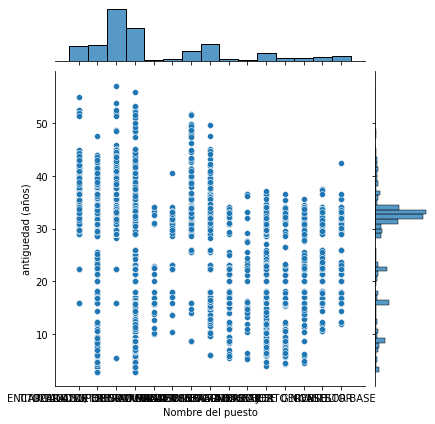

In [483]:
sns.jointplot(data=df_trab, x="Nombre del puesto", y="antiguedad (años)")

Correlación entre variables:

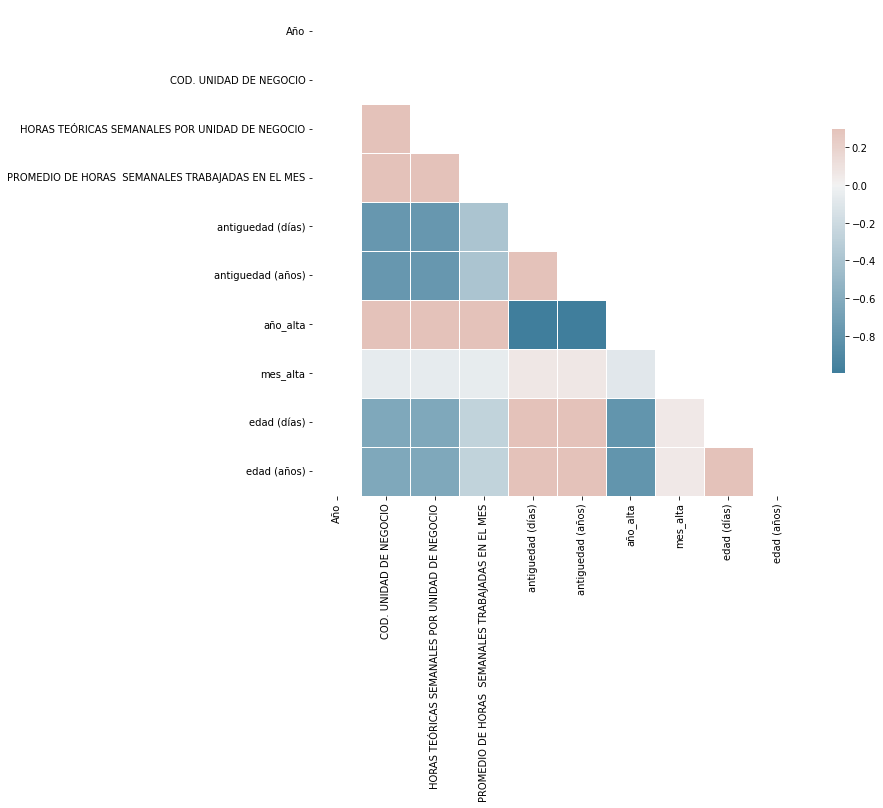

In [526]:
# Compute the correlation matrix
corr = plan19.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('heatmap.png')

In [529]:
corr['PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES']

Año                                                       NaN
COD. UNIDAD DE NEGOCIO                               0.501010
HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO       0.501010
PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES    1.000000
antiguedad (días)                                   -0.395237
antiguedad (años)                                   -0.395237
año_alta                                             0.395807
mes_alta                                            -0.054170
edad (días)                                         -0.268302
edad (años)                                         -0.268302
Name: PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES, dtype: float64

Interesante: correlacion negativo entre antigüedad en la empresa y horas dedicadas semanales. Cuanto mayor es la antigüedad en la empresa menos horas se dedica.

¿Existe influencia en la duración del empleado en la empresa si acepta el convenio aplicable?

In [485]:
plan19[plan19['Convenio Aplicable']=="Sí"]['antiguedad (años)'].mean()

27.814903737960424

In [486]:
plan19[plan19['Convenio Aplicable']=="No"]['antiguedad (años)'].mean()

10.49862675460877

In [487]:
plan19['Convenio Aplicable'].value_counts()

Sí    13270
No    10530
Name: Convenio Aplicable, dtype: int64

Número de empleados por pais 

In [488]:
plan19['Localización País'].value_counts()

Brasil    32412
España    16019
Name: Localización País, dtype: int64

<AxesSubplot:>

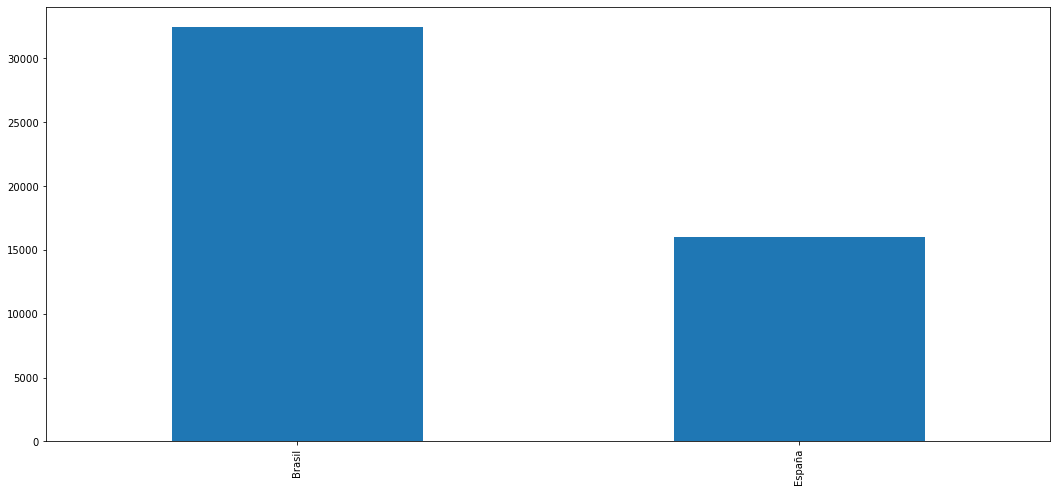

In [489]:
plan19['Localización País'].value_counts().plot(kind='bar')

¿Qué divisiones existen en cada país?

In [504]:
esp = plan19[plan19['Localización País']=="España"]
bra = plan19[plan19['Localización País']=="Brasil"]

In [505]:
divisiones=esp['División'].unique()
divisiones_bra = bra['División'].unique()
esp['División'].value_counts()

OPERACIONES, RED Y TI                   9174
CONSEJERA DELEGADA COO                  2152
TERRITORIAL CENTRO Y SECTORES GGCC      1087
TERRITORIAL MEDITERRANEO                1018
TERRITORIAL SUR                          676
TERRITORIAL NORTE                        596
FINANZAS Y CONTROL DE GESTION            447
SEGURIDAD Y PREVENCION DEL FRAUDE        255
ESTRATEGIA                               241
RECURSOS HUMANOS                         164
CALIDAD Y TRANSFORMACION                  97
SECRETARIO GENERAL Y REGULACION           71
AUDITORIA, INSPECCION E INTERVENCION      20
VIDEO ESPAÑA                              12
DESARROLLO DE NEGOCIO MULTIMARCA           9
Name: División, dtype: int64

In [506]:
bra['División'].value_counts()

BRA - VP Engenharia e Servicos ao Cliente    11434
BRA - VP B2C                                  7563
BRA - VP Atendimento ao Cliente               6309
BRA - VP B2B e Atacado                        2685
BRA - VP Tecnologia Informacao                1856
BRA - Chief Financial Officer                 1115
BRA - VP Pessoas                               537
BRA - VP Dados e Inteligencia Artificial       272
BRA - VP Transformacao e Qualidade             244
BRA - VP Juridico                              212
BRA - VP Assuntos Regulatórios                 112
BRA - Presidencia                               72
BRA_VP de Relacoes Institucionais                1
Name: División, dtype: int64

¿Existe disparidad entre la longevidad de los empleados según el país?

In [507]:
esp['antiguedad (años)'].mean()

27.278040888088604

In [508]:
stat.mode(esp['antiguedad (años)'])

31.9013698630137

In [509]:
bra['antiguedad (años)'].mean()

8.476188846005414

In [510]:
stat.mode(bra['antiguedad (años)'])

3.0027397260273974

Localizaciones por país

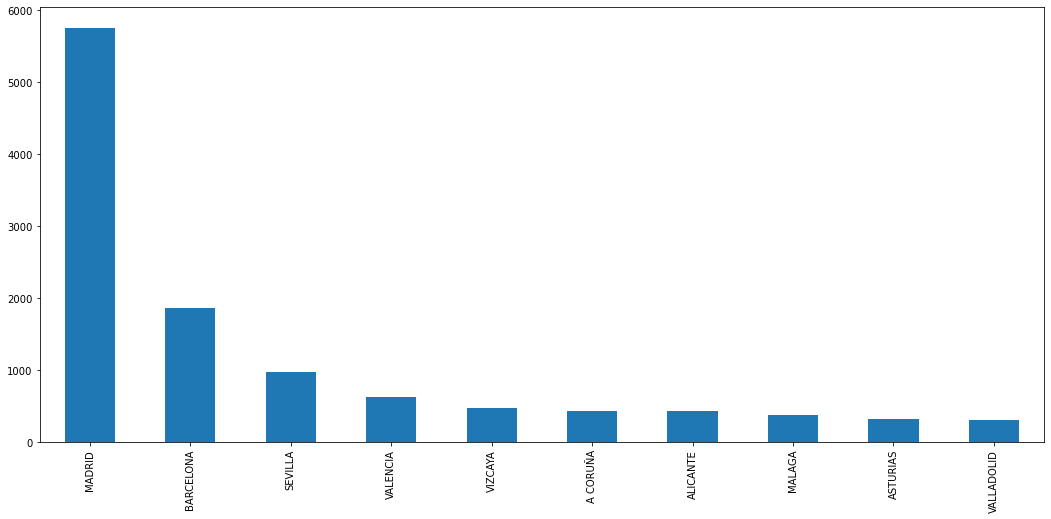

In [511]:
esp['Localización Ciudad'].value_counts()[0:10].plot(kind='bar')
plt.savefig('loc_empleados_esp.png')

In [515]:
bra['Localización Ciudad'].value_counts()[:10]

São Paulo         5951
Curitiba          5920
SÃO PAULO         2122
Sao Paulo         2010
Fortaleza         1642
RIO DE JANEIRO    1405
Maringá           1214
Belo Horizonte     768
SAO PAULO          646
Brasília           550
Name: Localización Ciudad, dtype: int64

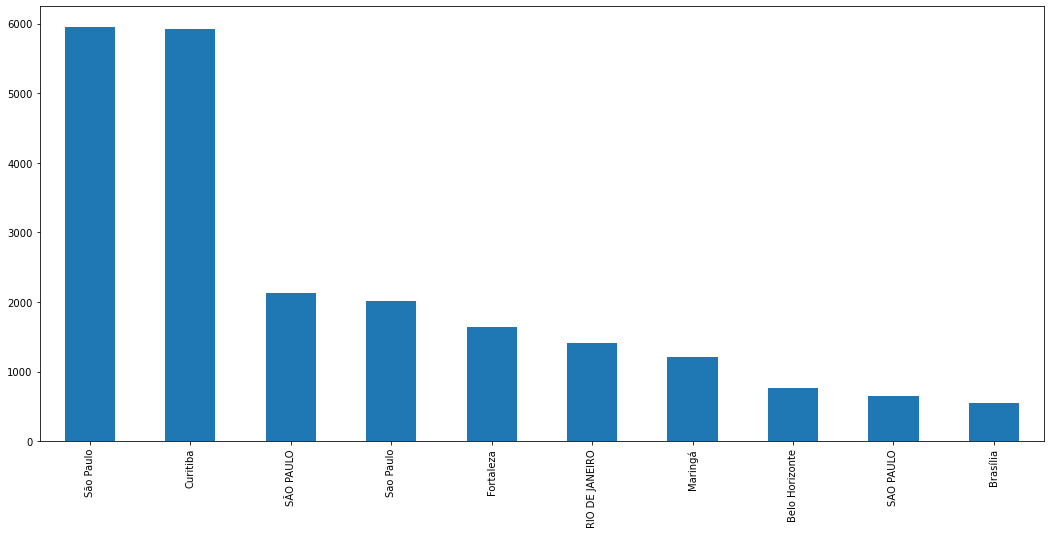

In [512]:
bra['Localización Ciudad'].value_counts()[0:10].plot(kind='bar')
plt.savefig('loc_empleados_bra.png')

¿En qué ciudades estan distribuidos los empleados en función de su división?

<AxesSubplot:>

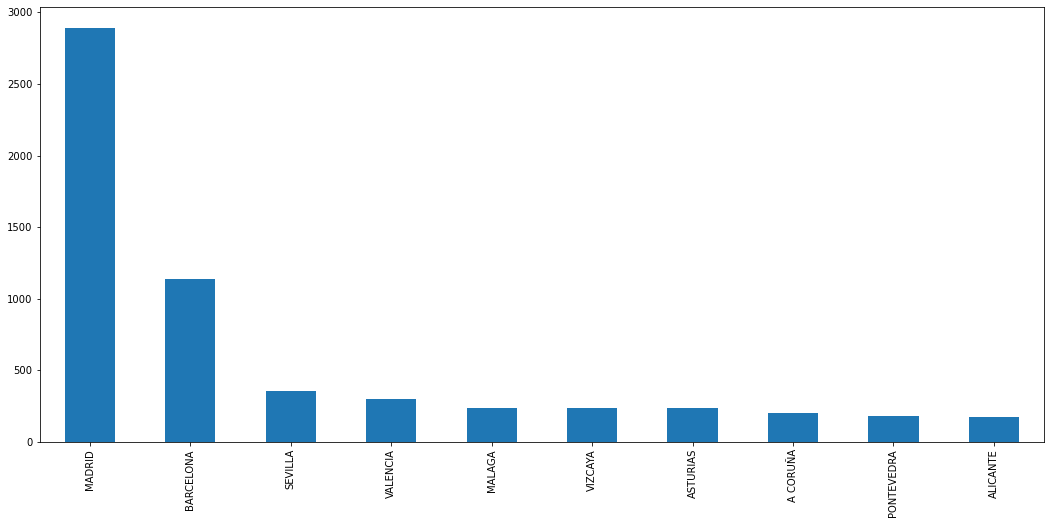

In [383]:
esp[esp['División']=="OPERACIONES, RED Y TI"]['Localización Ciudad'].value_counts()[0:10].plot(kind='bar')

<AxesSubplot:>

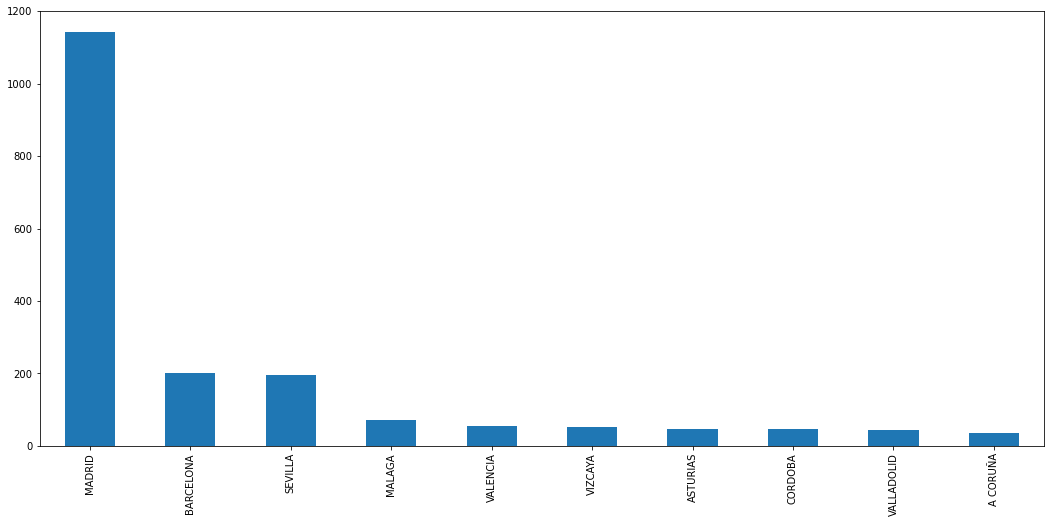

In [384]:
esp[esp['División']=="CONSEJERA DELEGADA COO"]['Localización Ciudad'].value_counts()[0:10].plot(kind='bar')

<AxesSubplot:>

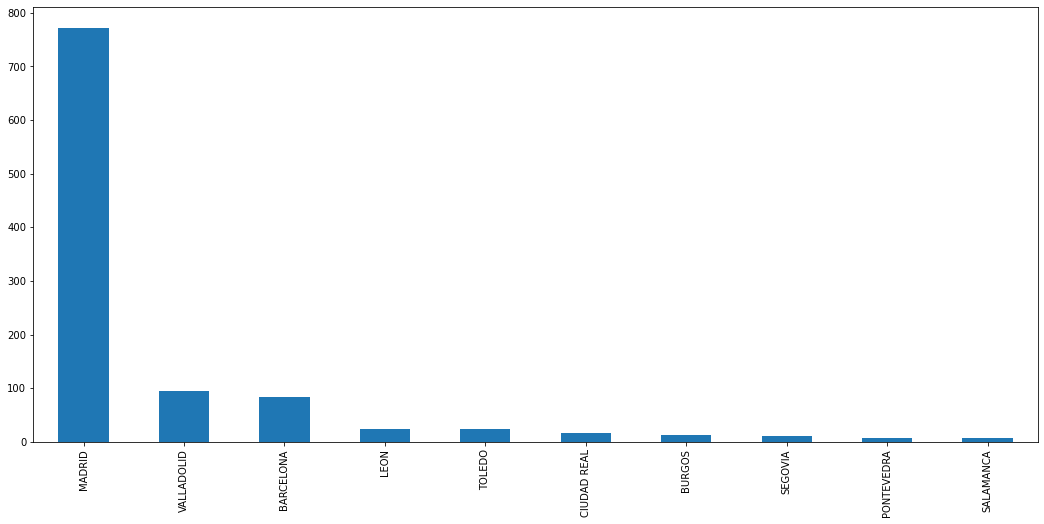

In [385]:
esp[esp['División']=="TERRITORIAL CENTRO Y SECTORES GGCC"]['Localización Ciudad'].value_counts()[0:10].plot(kind='bar')

In [517]:
len(esp[esp['Localización Ciudad']=="MADRID"])

5757

In [521]:
len(esp[esp['Localización Ciudad']=="BARCELONA"])

1863

In [523]:
len(esp[(esp['Localización Ciudad']!="MADRID") & (esp['Localización Ciudad']!="BARCELONA")])

8399

Permanencia media de los trabajadores por división

In [386]:
for i in divisiones: 
    print("La media de permanencia en el dpto",i,"es de:",esp[esp['División']==i]['antiguedad (años)'].mean(),"años")

La media de permanencia en el dpto OPERACIONES, RED Y TI es de: 29.93925298117612 años
La media de permanencia en el dpto CONSEJERA DELEGADA COO es de: 24.31161455415814 años
La media de permanencia en el dpto ESTRATEGIA es de: 17.46247939521401 años
La media de permanencia en el dpto TERRITORIAL MEDITERRANEO es de: 25.318249589579345 años
La media de permanencia en el dpto TERRITORIAL CENTRO Y SECTORES GGCC es de: 20.862285289410313 años
La media de permanencia en el dpto SEGURIDAD Y PREVENCION DEL FRAUDE es de: 23.247187751813044 años
La media de permanencia en el dpto FINANZAS Y CONTROL DE GESTION es de: 25.417829671171578 años
La media de permanencia en el dpto RECURSOS HUMANOS es de: 24.47378884062813 años
La media de permanencia en el dpto TERRITORIAL SUR es de: 25.14426521844849 años
La media de permanencia en el dpto TERRITORIAL NORTE es de: 23.903705065734982 años
La media de permanencia en el dpto DESARROLLO DE NEGOCIO MULTIMARCA es de: 17.573820395738206 años
La media de per

In [405]:
esp['antiguedad (años)'].mean()

27.275301162061435

In [398]:
for i in divisiones_bra: 
    print("La media de permanencia en el dpto",i,"es de:",bra[bra['División']==i]['antiguedad (años)'].mean(),"años")

La media de permanencia en el dpto BRA - Presidencia es de: 10.57108066971081 años
La media de permanencia en el dpto BRA_VP de Relacoes Institucionais es de: 2.9424657534246577 años
La media de permanencia en el dpto BRA - Chief Financial Officer es de: 11.043621844093613 años
La media de permanencia en el dpto BRA - VP Pessoas es de: 10.417137317925555 años
La media de permanencia en el dpto BRA - VP Juridico es de: 11.036017058671495 años
La media de permanencia en el dpto BRA - VP Assuntos Regulatórios es de: 12.460861056751474 años
La media de permanencia en el dpto BRA - VP Tecnologia Informacao es de: 8.902358880491292 años
La media de permanencia en el dpto BRA - VP Engenharia e Servicos ao Cliente es de: 9.74125259679731 años
La media de permanencia en el dpto BRA - VP Dados e Inteligencia Artificial es de: 8.120326349717967 años
La media de permanencia en el dpto BRA - VP Atendimento ao Cliente es de: 6.265504161265484 años
La media de permanencia en el dpto BRA - VP B2C es d

Edades por division

In [390]:
for i in divisiones: 
    print("Dpto:",i,"media:",round(esp[esp['División']==i]['edad (años)'].mean(),2),
          "minima:",round(esp[esp['División']==i]['edad (años)'].min(),2),
          "maxima:",round(esp[esp['División']==i]['edad (años)'].max(),2),
          "moda",stat.mode(esp[esp['División']==i]['edad (años)'])
         )

Dpto: OPERACIONES, RED Y TI media: 53.64 minima: 25.61 maxima: 74.0 moda 55.12054794520548
Dpto: CONSEJERA DELEGADA COO media: 50.22 minima: 26.09 maxima: 72.13 moda 52.92602739726028
Dpto: ESTRATEGIA media: 44.63 minima: 25.76 maxima: 66.19 moda 55.016438356164386
Dpto: TERRITORIAL MEDITERRANEO media: 50.99 minima: 25.78 maxima: 71.32 moda 51.66849315068493
Dpto: TERRITORIAL CENTRO Y SECTORES GGCC media: 49.27 minima: 28.38 maxima: 71.93 moda 54.92876712328767
Dpto: SEGURIDAD Y PREVENCION DEL FRAUDE media: 48.75 minima: 26.99 maxima: 70.53 moda 54.58904109589041
Dpto: FINANZAS Y CONTROL DE GESTION media: 51.61 minima: 28.62 maxima: 71.29 moda 60.85205479452055
Dpto: RECURSOS HUMANOS media: 50.51 minima: 28.82 maxima: 72.25 moda 54.367123287671234
Dpto: TERRITORIAL SUR media: 50.68 minima: 28.01 maxima: 63.89 moda 53.78904109589041
Dpto: TERRITORIAL NORTE media: 50.79 minima: 27.68 maxima: 65.5 moda 55.04383561643836
Dpto: DESARROLLO DE NEGOCIO MULTIMARCA media: 44.66 minima: 34.05 max

In [401]:
for i in divisiones_bra: 
    print("Dpto:",i,"media:",round(bra[bra['División']==i]['edad (años)'].mean(),2),
          "minima:",round(bra[bra['División']==i]['edad (años)'].min(),2),
          "maxima:",round(bra[bra['División']==i]['edad (años)'].max(),2),
          "moda",stat.mode(bra[bra['División']==i]['edad (años)'])
         )

Dpto: BRA - Presidencia media: 42.0 minima: 28.94 maxima: 62.98 moda 53.608219178082194
Dpto: BRA_VP de Relacoes Institucionais media: 59.73 minima: 59.73 maxima: 59.73 moda 59.726027397260275
Dpto: BRA - Chief Financial Officer media: 41.12 minima: 25.14 maxima: 67.75 moda 38.893150684931506
Dpto: BRA - VP Pessoas media: 40.63 minima: 23.65 maxima: 69.75 moda 36.172602739726024
Dpto: BRA - VP Juridico media: 41.51 minima: 27.32 maxima: 73.07 moda 39.61369863013699
Dpto: BRA - VP Assuntos Regulatórios media: 44.3 minima: 27.42 maxima: 62.83 moda 54.63835616438356
Dpto: BRA - VP Tecnologia Informacao media: 40.09 minima: 23.69 maxima: 75.74 moda 39.18082191780822
Dpto: BRA - VP Engenharia e Servicos ao Cliente media: 40.67 minima: 21.05 maxima: 72.09 moda 46.11506849315069
Dpto: BRA - VP Dados e Inteligencia Artificial media: 38.32 minima: 25.24 maxima: 55.81 moda 31.063013698630137
Dpto: BRA - VP Atendimento ao Cliente media: 33.95 minima: 21.16 maxima: 68.05 moda 25.172602739726027
Dp

In [532]:
esp['edad (años)'].mean()

52.133325579983506

Géneros por división

OPERACIONES, RED Y TI
CONSEJERA DELEGADA COO
ESTRATEGIA
TERRITORIAL MEDITERRANEO
TERRITORIAL CENTRO Y SECTORES GGCC
SEGURIDAD Y PREVENCION DEL FRAUDE
FINANZAS Y CONTROL DE GESTION
RECURSOS HUMANOS
TERRITORIAL SUR
TERRITORIAL NORTE
DESARROLLO DE NEGOCIO MULTIMARCA
CALIDAD Y TRANSFORMACION
SECRETARIO GENERAL Y REGULACION
VIDEO ESPAÑA
AUDITORIA, INSPECCION E INTERVENCION


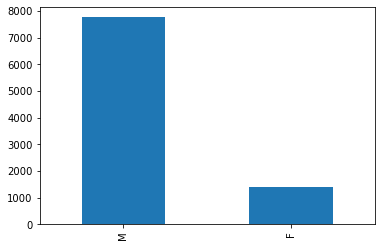

In [167]:
for i in divisiones: 
    print(i)
    esp[esp['División']==i]['Género'].value_counts().plot(kind='bar')

Contrataciones por mes

<AxesSubplot:>

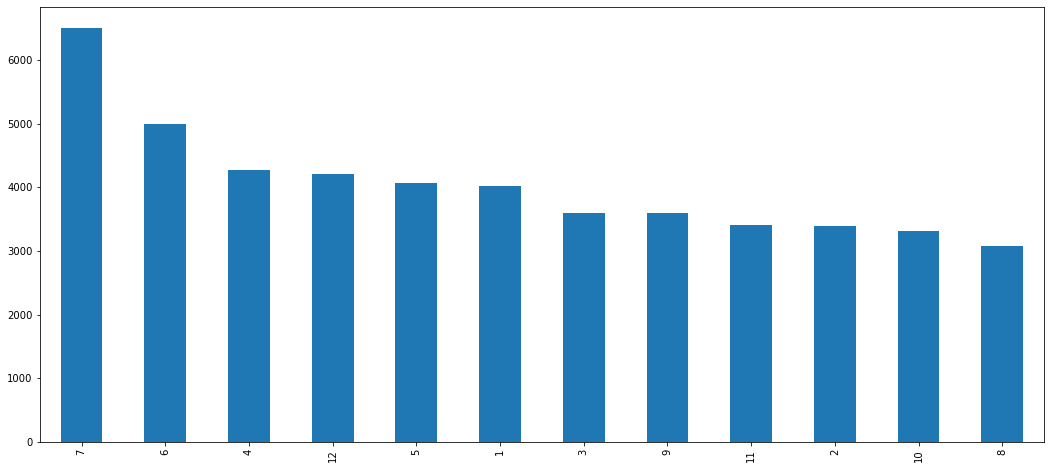

In [391]:
plan19['mes_alta'].value_counts().plot(kind='bar')

Contrataciones por mes y género

In [117]:
month_pos=pd.DataFrame(plan19.groupby('mes_alta')['Género'].value_counts())
month_pos.rename(columns = {'Género':'count'}, inplace = True)
month_pos=month_pos.reset_index()
month_pos.head(10)

,mes_alta,Género,count
0,01,M,2343
1,01,F,1684
2,02,M,1970
3,02,F,1425
4,03,M,2284
5,03,F,1313
6,04,M,2738
7,04,F,1533
8,05,M,2561
9,05,F,1512


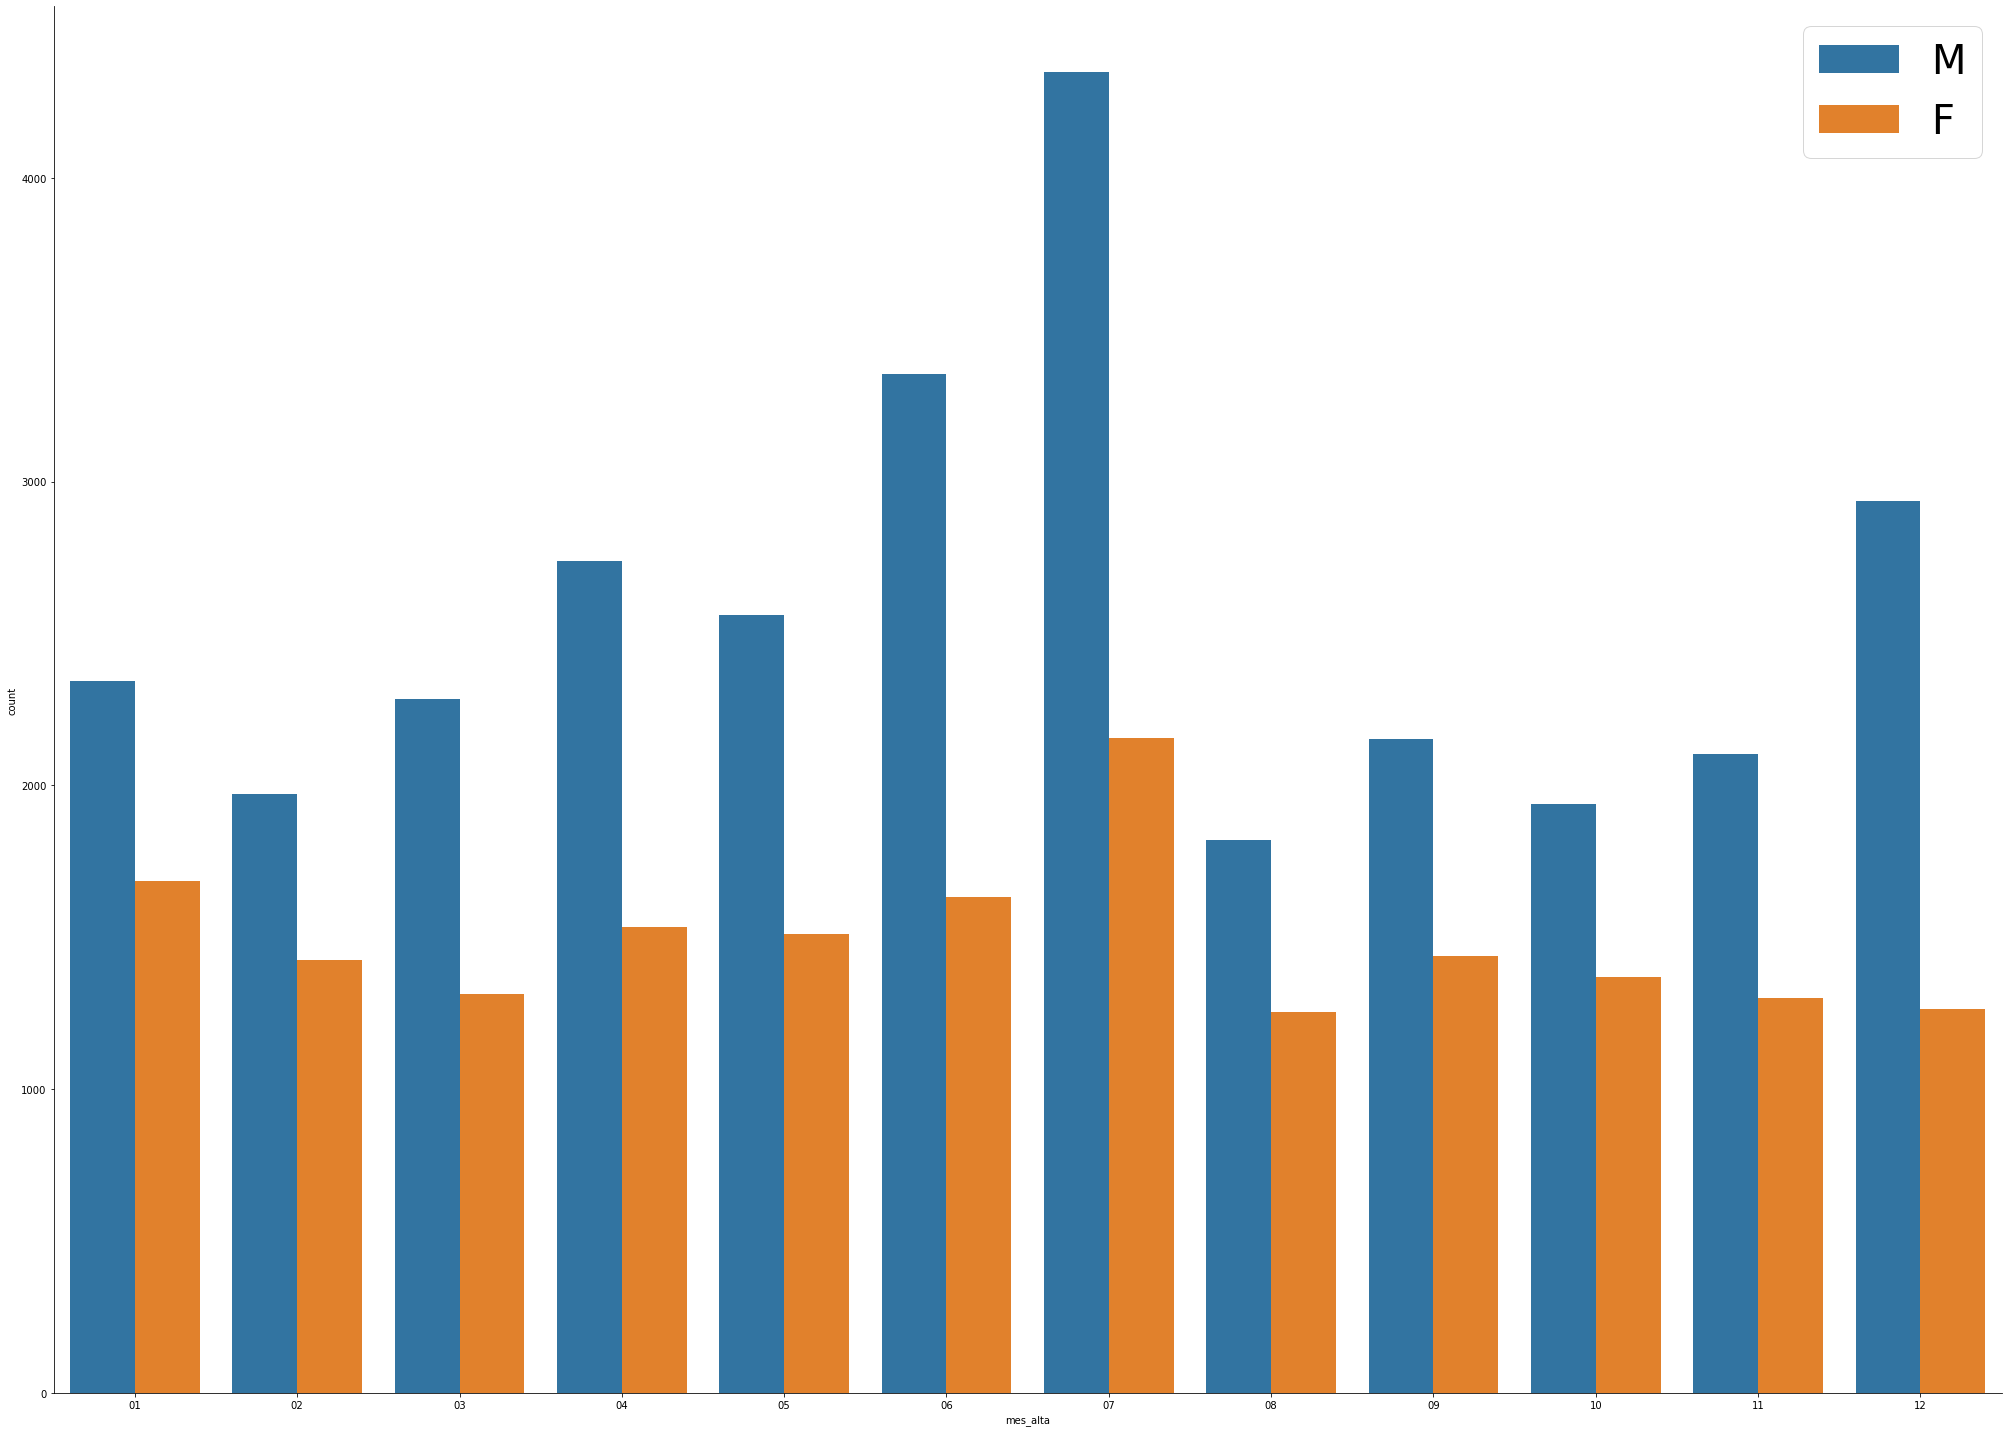

In [450]:
ax = sns.catplot(x="mes_alta", y="count",
                hue="Género",
                data=month_pos, kind="bar",
                height=20, aspect=1.4, legend=False)
plt.legend(fontsize='40', title_fontsize='60')
plt.savefig('contrat_mes_genero.png')

Trabajadores que dedican menos de las horas teoricas estipuladas

In [227]:
plan19[plan19['HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO']>plan19['PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES']]

,Convenio Aplicable,Localización País,Área Funcional,Localización Ciudad,Subactividad_desc,Año,COD. UNIDAD DE NEGOCIO,Mes,Reducción de Jormada,Tipo de contrato,División,Subactividad,Género,Departamento,HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO,Nombre del puesto,Nacionalidad,Estado de empleado,PROMEDIO DE HORAS SEMANALES TRABAJADAS EN EL MES,Fecha de Nacimiento,Clase de empleado,Discapacidad,Fecha de Alta,ID persona,antiguedad (días),antiguedad (años),edad (días),edad (años),numero,Fecha2
52,Sí,España,Seguridad y Prot. - Seguridad Física,BARCELONA,vigilanciayseguridad,2019,156,Jul,Sí,Fijo,SEGURIDAD Y PREVENCION DEL FRAUDE,Vigilancia y Seguridad,M,NaN,37.5,ADMINISTRATIVO,ESPAÑOLA,Activo,32.8,1969-01-14,EMP,No,1988-06-01,Persona 1716904,12427,34.046575,19505,34.046575,1,1988-06-01
59,Sí,España,Seguridad y Prot. - Seguridad Física,SEVILLA,vigilanciayseguridad,2019,156,Jul,Sí,Fijo,SEGURIDAD Y PREVENCION DEL FRAUDE,Vigilancia y Seguridad,M,NaN,37.5,ADMINISTRATIVO,ESPAÑOLA,Activo,32.8,1951-12-19,EMP,No,1982-06-21,Persona 1716911,14599,39.997260,25741,39.997260,1,1982-06-21
62,Sí,España,Seguridad y Prot. - Seguridad Física,SEVILLA,vigilanciayseguridad,2019,156,Jul,Sí,Fijo,SEGURIDAD Y PREVENCION DEL FRAUDE,Vigilancia y Seguridad,M,NaN,37.5,ADMINISTRATIVO,ESPAÑOLA,Activo,32.8,1963-02-04,EMP,No,1982-12-22,Persona 1716914,14415,39.493151,21676,39.493151,1,1982-12-22
64,Sí,España,Seguridad y Prot. - Seguridad Física,VIZCAYA,vigilanciayseguridad,2019,156,Jul,Sí,Fijo,SEGURIDAD Y PREVENCION DEL FRAUDE,Vigilancia y Seguridad,F,NaN,37.5,ADMINISTRATIVO,ESPAÑOLA,Activo,32.8,1963-06-14,EMP,No,1988-08-16,Persona 1716916,12351,33.838356,21546,33.838356,1,1988-08-16
82,Sí,España,Seguridad y Prot. - Seguridad Física,A CORUÑA,vigilanciayseguridad,2019,156,Jul,Sí,Fijo,SEGURIDAD Y PREVENCION DEL FRAUDE,Vigilancia y Seguridad,M,NaN,37.5,ADMINISTRATIVO,ESPAÑOLA,Activo,34.5,1962-06-06,EMP,No,1989-05-16,Persona 1716934,12078,33.090411,21919,33.090411,1,1989-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48424,No,Brasil,NaN,São Paulo,talentoydesarrollo,2019,185,Jul,No,Fijo,BRA - VP Pessoas,Talento y Desarrollo,F,BRA_Coord Desenvolvimento Organizacional,44.0,Estagiario,NaN,Activo,36.0,1992-06-07,PRA,No,2019-04-02,Persona 1435526,1165,3.191781,10960,3.191781,1,2019-04-02
48425,No,Brasil,NaN,São Paulo,asesoríalegalysoportejurídico,2019,185,Jul,No,Fijo,BRA - VP Juridico,Asesoría legal y soporte jurídico,M,BRA_Ger Sr Juridica de Produtos e Serv,44.0,ESTAGIARIO,NaN,Activo,36.0,1994-12-13,PRA,No,2017-10-11,Persona 1435527,1703,4.665753,10041,4.665753,1,2017-10-11
48426,No,Brasil,NaN,São Paulo,producciónit,2019,185,Jul,No,Fijo,BRA - VP Tecnologia Informacao,Producción IT,M,BRA_GER FINANCAS,44.0,ESTAGIARIO,NaN,Activo,36.0,1996-06-04,PRA,No,2017-10-11,Persona 1435528,1703,4.665753,9502,4.665753,1,2017-10-11
48427,No,Brasil,NaN,Sao Paulo,aplicaciones/desarrollo,2019,185,Jul,No,Fijo,BRA - VP Engenharia e Servicos ao Cliente,Aplicaciones/Desarrollo,M,BRA_Ger Servicos de Dados,44.0,Estagiario,NaN,Activo,36.0,1995-03-20,PRA,No,2017-10-11,Persona 1435529,1703,4.665753,9944,4.665753,1,2017-10-11


In [228]:
infra_trab = plan19[plan19['HORAS TEÓRICAS SEMANALES POR UNIDAD DE NEGOCIO']>plan19['PROMEDIO DE HORAS  SEMANALES TRABAJADAS EN EL MES']]

In [402]:
len(infra_trab)

23626

In [403]:
len(plan19)

48431

Divisiones con más trabajadores haciendo menos horas de las teóricas

In [230]:
infra_trab['División'].value_counts()

BRA - VP Engenharia e Servicos ao Cliente    7151
BRA - VP Atendimento ao Cliente              5715
BRA - VP B2C                                 4144
BRA - VP B2B e Atacado                       2268
BRA - VP Tecnologia Informacao               1529
BRA - Chief Financial Officer                1059
BRA - VP Pessoas                              496
BRA - VP Dados e Inteligencia Artificial      224
BRA - VP Juridico                             203
BRA - VP Transformacao e Qualidade            199
OPERACIONES, RED Y TI                         176
CONSEJERA DELEGADA COO                        148
BRA - VP Assuntos Regulatórios                109
BRA - Presidencia                              66
FINANZAS Y CONTROL DE GESTION                  33
TERRITORIAL MEDITERRANEO                       21
TERRITORIAL SUR                                21
TERRITORIAL CENTRO Y SECTORES GGCC             16
RECURSOS HUMANOS                               15
TERRITORIAL NORTE                              13


Evolución de empleados (serie temporal)

In [264]:
plan19['Fecha2']=plan19['Fecha de Alta']
plan19['numero']=1

In [265]:
dftotal2=plan19.resample('W', on='Fecha2').sum().reset_index().sort_values(by='Fecha2')[['Fecha2','numero']]

dftotal2.index = dftotal2.Fecha2
dftotal2.drop('Fecha2',axis=1,inplace=True)
serie = dftotal2.copy()
serie


,numero
Fecha2,
1965-06-06,1
1965-06-13,0
1965-06-20,0
1965-06-27,0
1965-07-04,0
...,...
2019-06-23,0
2019-06-30,0
2019-07-07,223


<AxesSubplot:xlabel='Fecha2'>

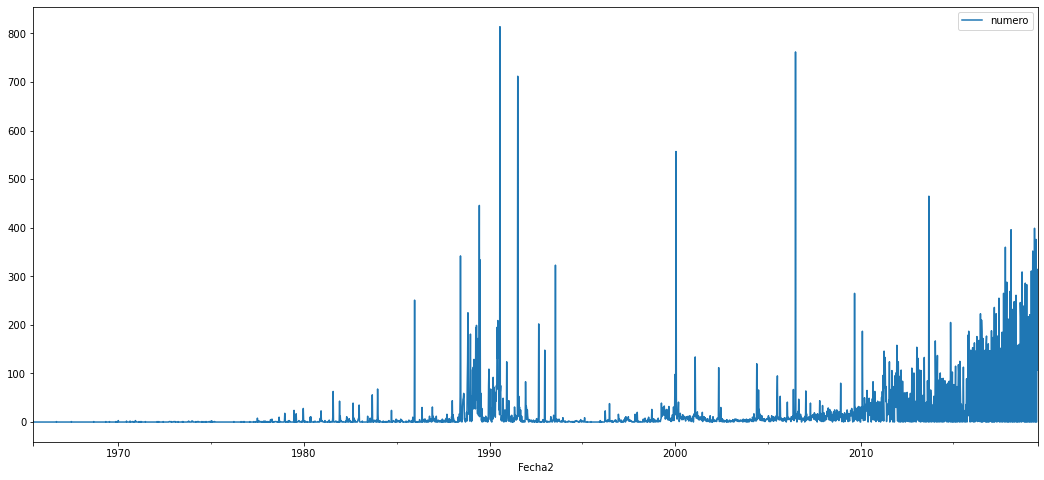

In [266]:
serie.plot()

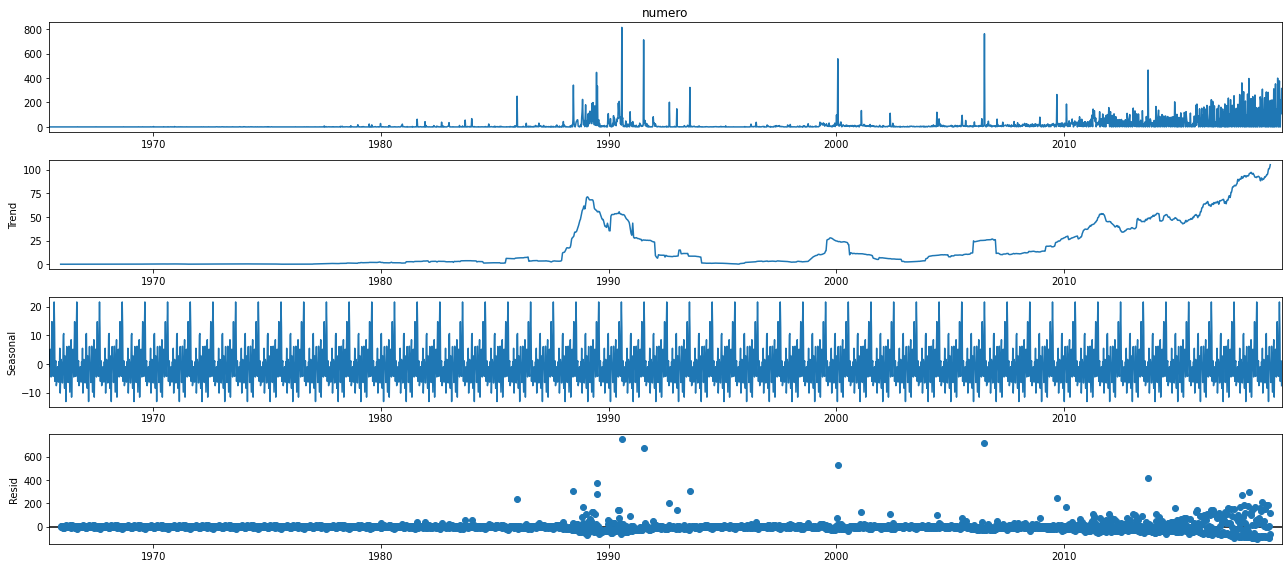

In [268]:
decomposition = sm.tsa.seasonal_decompose(serie['numero'], model='additive')
fig = decomposition.plot()
plt.show()

## Analisis altas del mes de Julio

Departamentos con más altas

In [392]:
df_bajas['Subactividad'].value_counts()[:10]

Call Center técnico                          97
Canal telefónico - Atención                  35
Supervisión de red                           32
Gestión de la morosidad e Impagos            19
Fuerza de ventas directa                     17
Operación de red                             14
Producción IT                                12
Relaciones Laborales y Gestión de Aliados    11
Planificación y controlling                  11
Selección                                    10
Name: Subactividad, dtype: int64

In [303]:
df_altas['Subactividad'].value_counts()[:10]

Fuerza de ventas directa                                   165
Canal telefónico - Atención                                153
Producción IT                                               98
Call Center técnico                                         32
Instalación y mantenimiento Red de Acceso (Red Externa)     29
Backoffice                                                  13
Mantenimiento Red Troncal (Red Interna)                     11
Soporte ventas                                               7
Operaciones Red para empresas                                7
Desarrollo de Proyectos Estratégicos y Transformación        7
Name: Subactividad, dtype: int64

Incorporaciones por países

In [304]:
df_altas['COD. UNIDAD DE NEGOCIO'].value_counts()
#578 altas en brasil
#156 en españa

185    578
156      5
Name: COD. UNIDAD DE NEGOCIO, dtype: int64

Tipo de altas

In [305]:
df_altas['Tipo alta global'].value_counts()

a) Procedentes de empresas AJENAS AL GRUPO    578
c.2) Reincorporaciones                          5
Name: Tipo alta global, dtype: int64

Edades de las altas

In [306]:
df_altas['edad (años)'].describe()

count    583.000000
mean      23.870274
std       11.720407
min        2.906849
25%       10.895890
50%       30.504110
75%       33.186301
max       52.473973
Name: edad (años), dtype: float64

In [339]:
plan19.to_excel('excel_datastudio2.xlsx') 

In [323]:
plan19['edad (años)'].mean()

42.814088904338824

In [324]:
plan19['antiguedad (años)'].mean()

14.692335119899502

In [407]:
df_bajas['Unidad de Negocio'].value_counts()

Brasil    354
España      6
Name: Unidad de Negocio, dtype: int64

In [409]:
df_altas

,Subactividad_desc,Subactividad,Genero,Fecha nacimiento,Clase empleado,Nombre del puesto,COD. UNIDAD DE NEGOCIO,Fecha alta,Tipo alta local,Tipo alta global,ID Persona,edad (días),edad (años)
0,tecnologíayplanificación,Tecnología y Planificación,M,1966-06-27,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-28,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19887,20438,55.994521
1,tecnologíayplanificación,Tecnología y Planificación,M,1970-12-20,EMP,ASESOR BASE,156,2019-08-09,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19888,18801,51.509589
2,gestionydireccion,Gestión y Direccion,M,1971-10-09,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-04,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19890,18508,50.706849
3,gestionydireccion,Gestión y Direccion,M,1971-01-03,EMP,OPERADOR DE COMUNICACIONES,156,2019-08-13,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19891,18787,51.471233
4,vigilanciayseguridad,Vigilancia y Seguridad,F,1962-11-26,EMP,ADMINISTRATIVO,156,2019-08-08,c.2) Reincorporaciones,c.2) Reincorporaciones,Persona 19892,21747,59.580822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,fuerzadeventasindirecta,Fuerza de ventas indirecta,F,1979-10-21,EMP,GERENTE NEGOCIOS IV,185,2019-08-05,Admissão,a) Procedentes de empresas AJENAS AL GRUPO,Persona 21248,15574,42.668493
579,fuerzadeventasdirecta,Fuerza de ventas directa,F,1973-11-20,EMP,GERENTE NEGOCIOS V,185,2019-08-05,Admissão,a) Procedentes de empresas AJENAS AL GRUPO,Persona 21249,17735,48.589041
580,fuerzadeventasdirecta,Fuerza de ventas directa,M,1972-07-20,EMP,GERENTE NEGOCIOS III,185,2019-08-15,Admissão,a) Procedentes de empresas AJENAS AL GRUPO,Persona 21250,18223,49.926027
581,fuerzadeventasdirecta,Fuerza de ventas directa,F,1990-05-20,EMP,GERENTE NEGOCIOS II,185,2019-08-13,Admissão,a) Procedentes de empresas AJENAS AL GRUPO,Persona 21251,11710,32.082192


In [410]:
df_altas['COD. UNIDAD DE NEGOCIO'].value_counts()

185    578
156      5
Name: COD. UNIDAD DE NEGOCIO, dtype: int64

In [412]:
plan19['Localización País'].value_counts()

Brasil    32412
España    16019
Name: Localización País, dtype: int64